### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [1]:
min_qubits=2
max_qubits=6
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                   "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Hydrogen Lattice - Method 1 - Fidelity of Ansatz

Hydrogen Lattice Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Aug 27, 2023 17:08:33 UTC
************
Executing [1] circuits for num_qubits = 2
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.152, 0.217, 0.002 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.152, 0.217, 0.002 secs
Average Tran

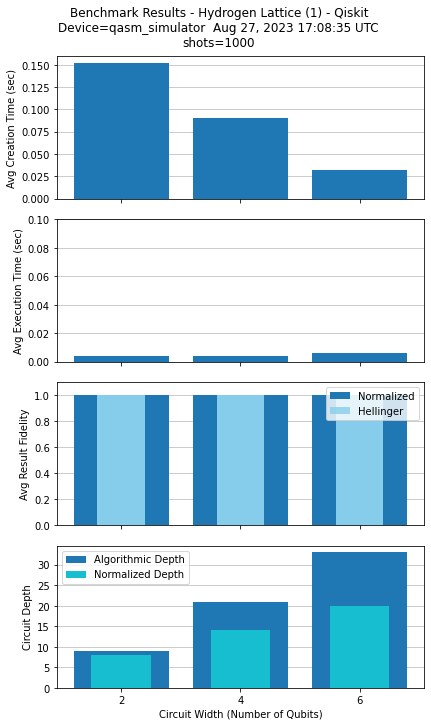

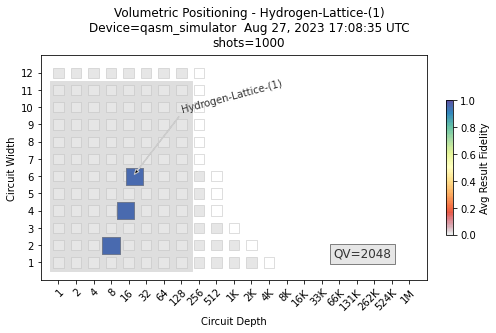

In [3]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, parameterized=False,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hydrogen Lattice - Method 2 - Energy as Objective Function

Hydrogen Lattice Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Aug 27, 2023 17:08:36 UTC
************
Executing [1] restarts for num_qubits = 2

................
Below Energies are for problem file h002_chain_000_75.json is for 2 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -1.1071064199798832

Below Classical Energies are in solution file h002_chain_000_75.sol is 2 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -1.1371170673457325
FCI calculated energy : -1.1371170673457325
Random solution calculated energy : 0.23161540155929444
... saving data for width=2 radius=None instance=1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.009, 0.054, 0.008 secs
Average Transpiling, Validating, Running Times for group

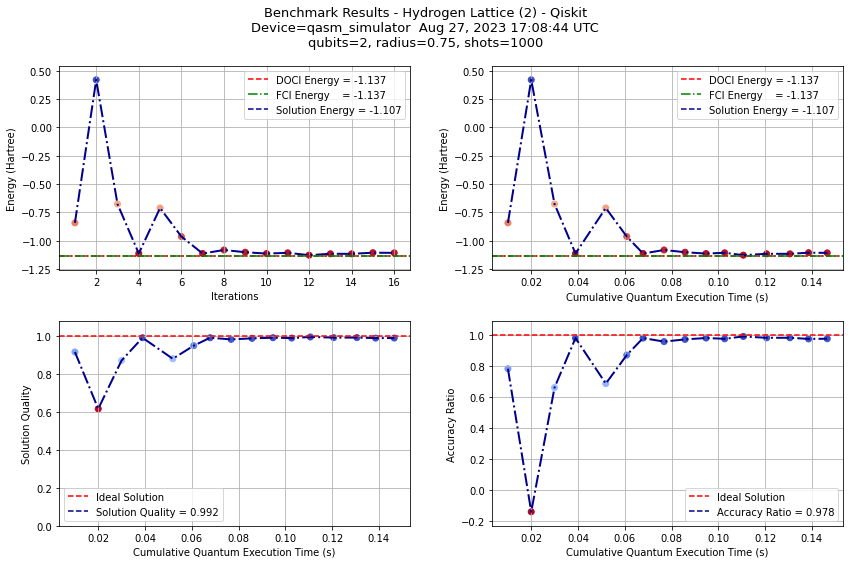

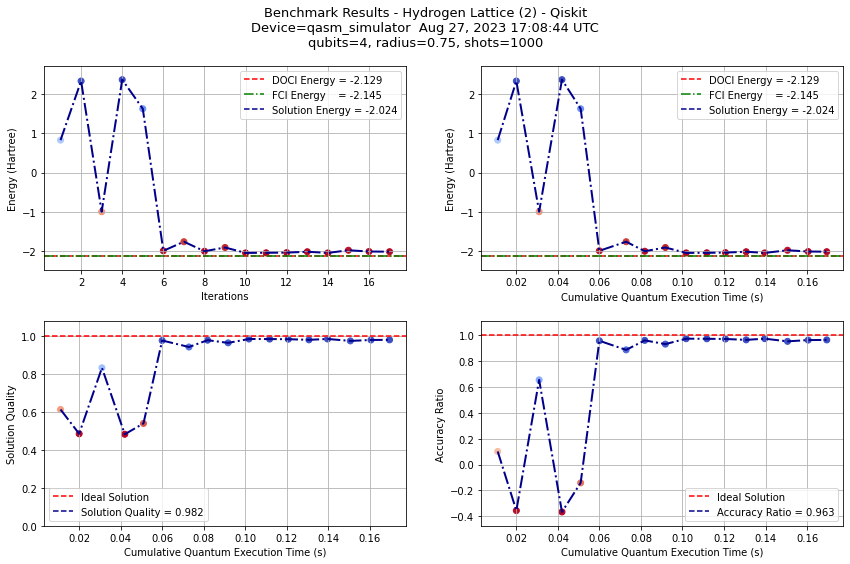

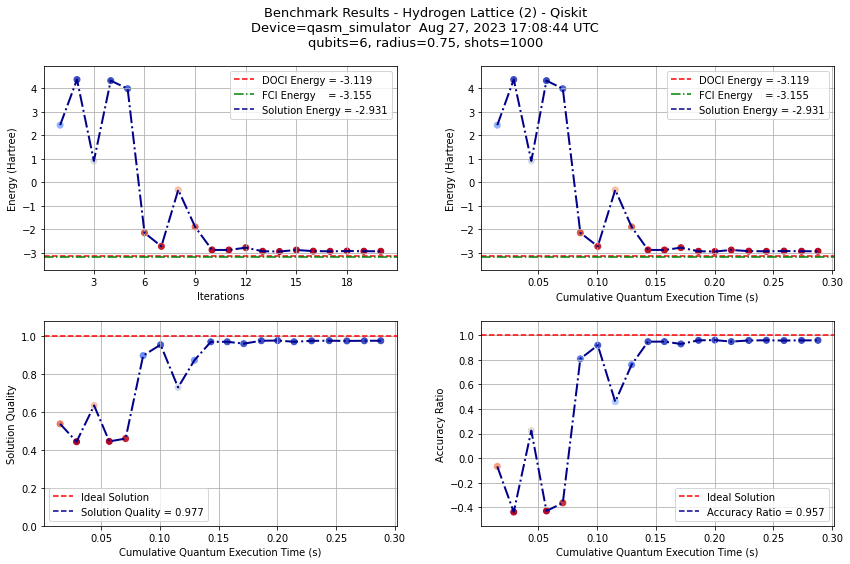

----- Cumulative Plots for all qubit groups -----


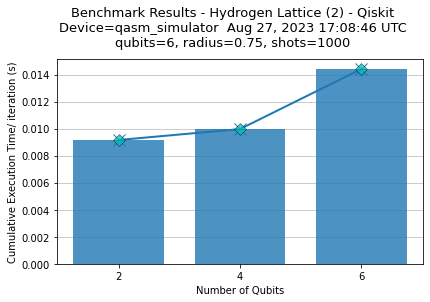

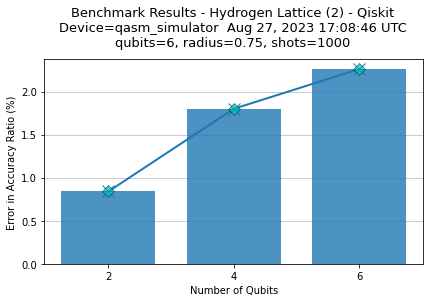

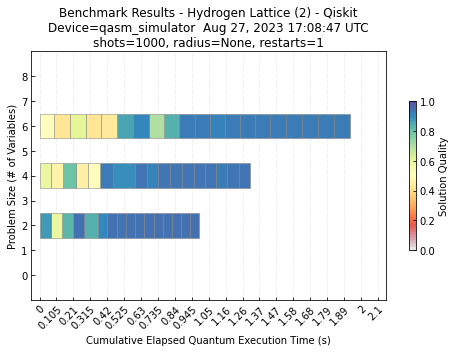

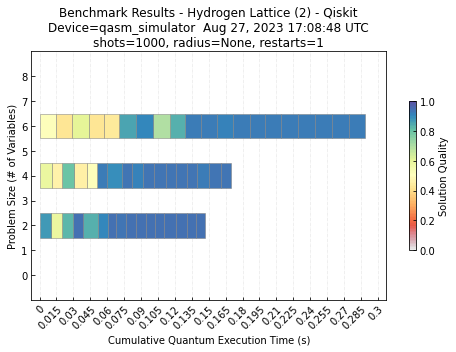

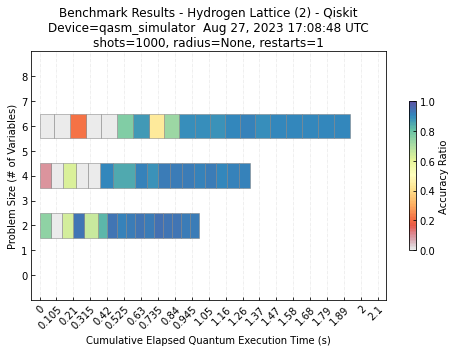

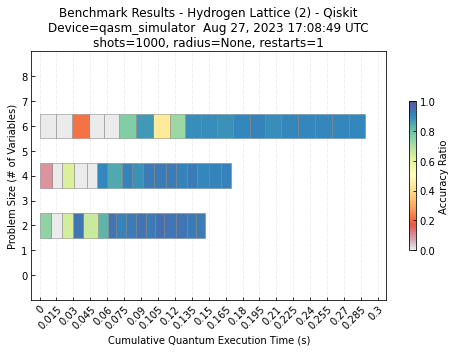

In [4]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# execute and display options
score_metric=['solution_quality', 'accuracy_ratio']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time']

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False, max_iter=30,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True, comfort=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... execution starting at Aug 27, 2023 17:08:51 UTC
Loading from width_2_instance_1.json, corresponding to 2 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.009, 0.054, 0.008 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.0, 0.0

Loading from width_4_instance_1.json, corresponding to 4 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 21, 0.186
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 14, 0.267, 8.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.02, 0.07, 0.009 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.00

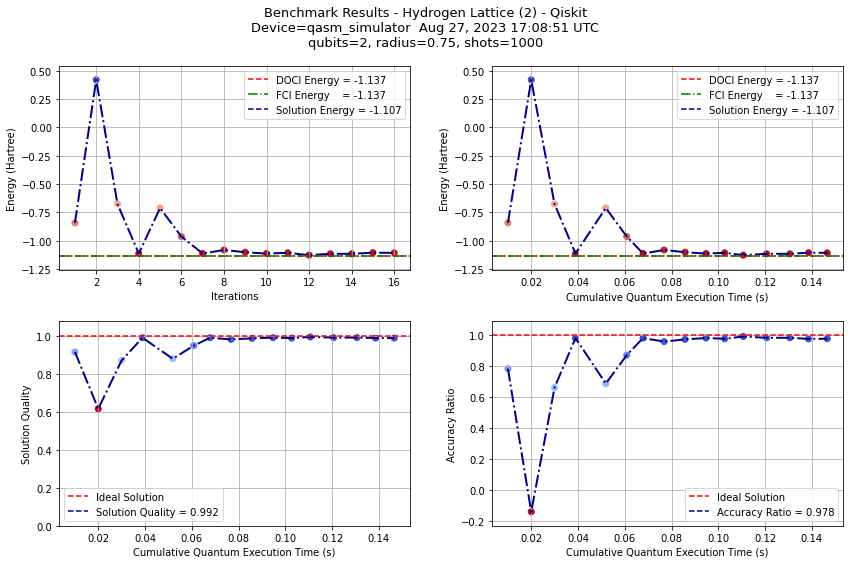

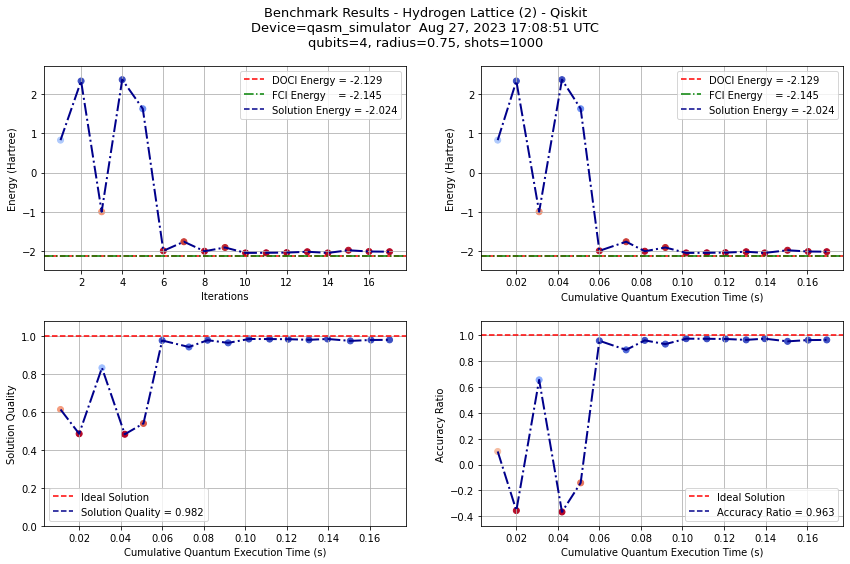

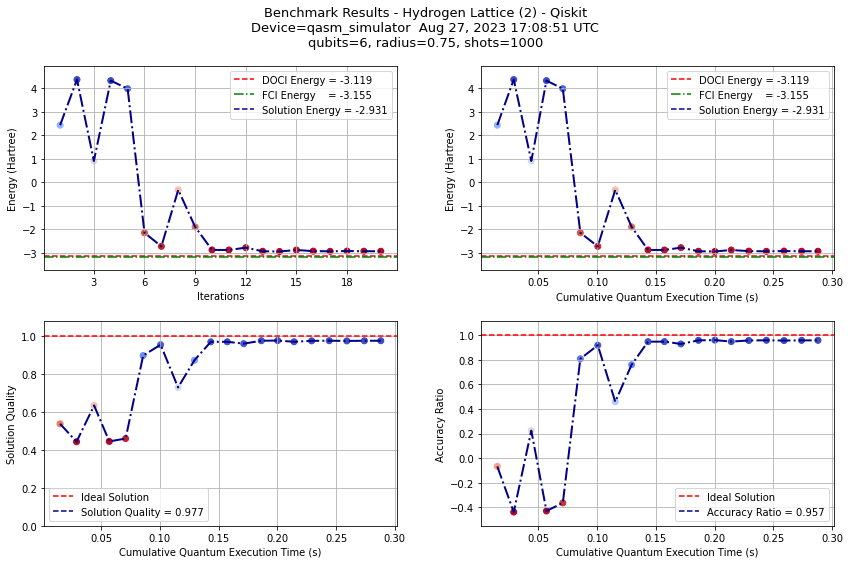

----- Cumulative Plots for all qubit groups -----


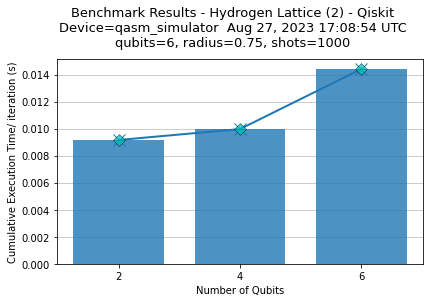

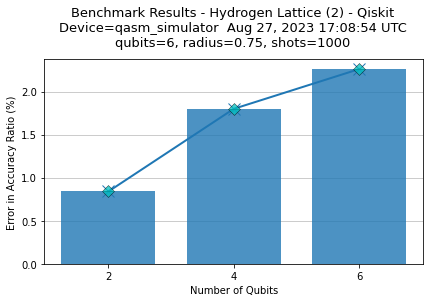

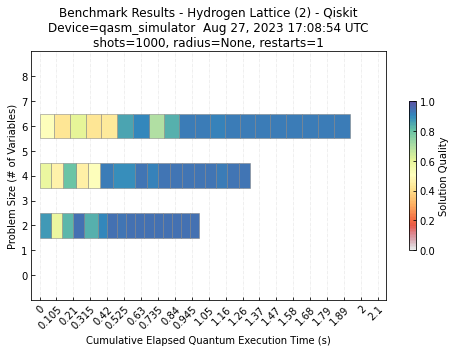

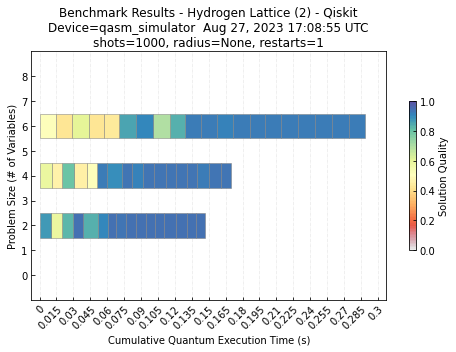

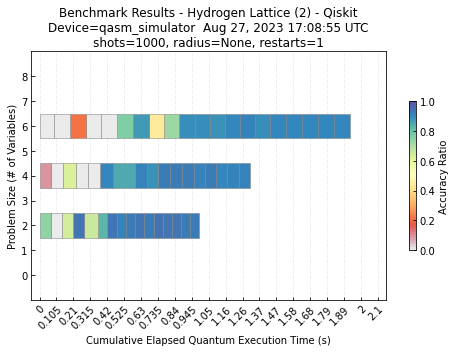

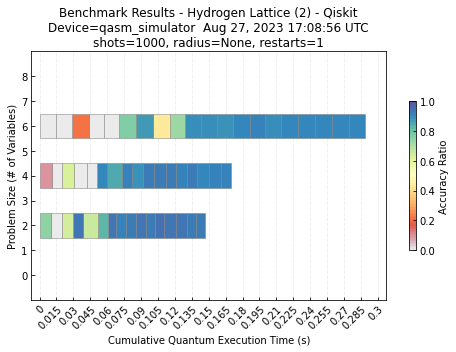

In [5]:
import os, hydrogen_lattice_benchmark

backend_id="qasm_simulator"

hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__data', backend_id, ''),                                             
                score_metric=['solution_quality', 'accuracy_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time'],
                individual=False)